# 1. Intro

### 本节覆盖内容：
- 如何构建不同类型图（有向图、无向图、加权图、无权图、二部图、完全图、多重图）
- 给图添加数据（点 边、属性）
- 删除图上数据（点 边、属性）
- 绘制不同图
- 查看图上基本信息（节点，边、属性、节点数、边数）
- 将数据保存（邻接矩阵、邻接列表、边列表）



In [1]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import networkx as nx
# networkx==2.3

### 不同类型的图

从课上，我们了解到图的集中分类。

- 1. 根据边的方向
    - 无向图，如：同事关系，论文合作关系
    - 有向图，如：B站用户关注与被关注关系。

- 2. 边是否有权重
    - 无权图，权重为1
    - 加权图


- 3. 节点连接方式
    - 二部图（Bipartite graph）：图可分为两类内部不相连的节点集。如：作者--论文图，电影--演员图
    - 完全图（complete graph）。任意两点都有边相连
    - 自环图（Self-edges (self-loops)）。自己与自己相连。邻居矩阵的对角线不为0.
    - 多重图 （ Multigraph ）。存在两点之间大于一条边。
在networkx 中可以很方便实现。

In [2]:
# 无向图
G1 = nx.Graph()  
# 可权重（属性）（weighted graph）； 可Self loops (self-loops graph)；不可 multiple edges（ Multigraph ）

In [3]:
# 有向图
G2 = nx.DiGraph()
# 可权重（属性）（weighted graph）； 可Self loops (self-loops graph)；不可 multiple edges（ Multigraph ）

In [4]:
# 无向 多重图
G3 = nx.MultiGraph() 
# 可权重（属性）（weighted graph）； 可Self loops (self-loops graph)；可 multiple edges（ Multigraph ）

In [5]:
# 有向 多重图
G4 = nx.MultiDiGraph()
# 可权重（属性）（weighted graph）； 可Self loops (self-loops graph)；可 multiple edges（ Multigraph ）    

### 给图添加数据

上面都是空图，下面来导入数据看看

In [6]:
def add_data_to_graph(G,plot=True):
    # 添加节点
    G.add_nodes_from([1,2,3,4])
    # 一次加一条边
    G.add_edge(2,3)
    
    # 一次加多条边
    G.add_edges_from([(1,4),(2,5),(3,5),(3,5),(3,4),(1,5),(1,7),(1,7),(7,8)])
    
    # 添加带权重or属性的边
    G.add_edges_from([(3, 8, {'weight': 3.1415,'age':18})])
    
    if plot:
        # 默认networkx 是画不出 multigraph 不重叠的边的 
        # nx.draw_shell(G, with_labels=True, font_weight='bold')
        # 用于绘制 multigraph
        plot_graph(G)
    return G

### 图的可视化

In [7]:
def plot_graph(G,bipartite=False,bipartite_nodes=None):
    """
    绘制网络图的函数
    function refer:https://stackoverflow.com/questions/14943439/how-to-draw-multigraph-in-networkx-using-matplotlib-or-graphviz
    params refer: https://networkx.org/documentation/stable/reference/drawing.html
    """
    
    pos = nx.kamada_kawai_layout(G)  if not bipartite else  nx.bipartite_layout(G,bipartite_nodes)
    # 绘制节点
    nx.draw_networkx_nodes(G, pos=pos, node_color = 'r', node_size = 200, alpha = 1)
    # 绘制标签
    nx.draw_networkx_labels(G,pos=pos)
    ax = plt.gca()
    for e in G.edges:
        print(e)
        edge_times = e[2] if len(e)==3 else 0
        ax.annotate("",
                    xy=pos[e[0]], xycoords='data',
                    xytext=pos[e[1]], textcoords='data',
                    arrowprops=dict(arrowstyle="<-", color="0.1",
                                    shrinkA=5, shrinkB=5,
                                    patchA=None, patchB=None,
                                    connectionstyle="arc3,rad=rrr".replace('rrr',str(0.3*edge_times)
                                    ),
                                    ),
                    )
    plt.axis('off')
    plt.show()

(1, 4)
(1, 5)
(1, 7)
(2, 3)
(2, 5)
(3, 5)
(3, 4)
(3, 8)
(7, 8)


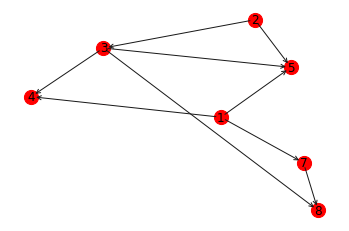

In [8]:
# 无向图  G1 = nx.Graph()  对重复边进行过滤
G1 = add_data_to_graph(G1)

(1, 4)
(1, 5)
(1, 7)
(2, 3)
(2, 5)
(3, 5)
(3, 4)
(3, 8)
(7, 8)


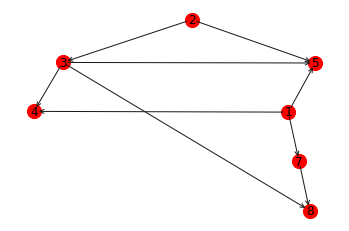

In [9]:
# 有向图  G2 = nx.DiGraph()  对重复边进行过滤
G2 = add_data_to_graph(G2)

(1, 4, 0)
(1, 5, 0)
(1, 7, 0)
(1, 7, 1)
(2, 3, 0)
(2, 5, 0)
(3, 5, 0)
(3, 5, 1)
(3, 4, 0)
(3, 8, 0)
(7, 8, 0)


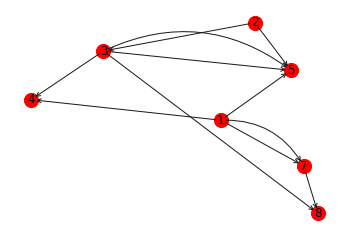

In [10]:
# 无向 多重图  G3 = nx.MultiGraph()  对重复边进行保留
G3 = add_data_to_graph(G3)

(1, 4, 0)
(1, 5, 0)
(1, 7, 0)
(1, 7, 1)
(2, 3, 0)
(2, 5, 0)
(3, 5, 0)
(3, 5, 1)
(3, 4, 0)
(3, 8, 0)
(7, 8, 0)


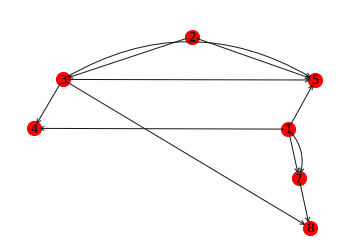

In [11]:
# 有向 多重图  G3 = nx.MultiDiGraph()  对边重复进行保留

G4 = add_data_to_graph(G4)

### 删除图上数据

(2, 3)
(2, 5)
(3, 5)
(3, 8)


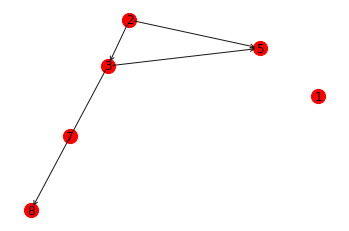

In [12]:
G2.remove_node(4)
G2.remove_nodes_from([(2,8)])
G2.remove_edge(1,7)
G2.remove_edges_from([(1,5),(7,8)])
plot_graph(G2)

In [13]:
# 获取边的属性，是个字典，对字典进行删除还是修改操作，达到修改边的属性的目的。
G2.get_edge_data(3,8)

{'weight': 3.1415, 'age': 18}

### 图数学的表示

- 邻接矩阵（Adjacency matrix）
- 邻接列表（Adjacency list）
- 边列表（Edge list）

In [14]:
def print_result(out):
    for i in out:
        print(i)

#### 1. 邻接矩阵（Adjacency matrix）

In [15]:
# 邻接矩阵
# out1 = nx.adjacency_matrix(G1).todense()
out1 = nx.convert_matrix.to_numpy_array(G1,weight = None)  # 去除权重

print_result(out1)

[0. 0. 0. 1. 1. 1. 0.]
[0. 0. 1. 0. 1. 0. 0.]
[0. 1. 0. 1. 1. 0. 1.]
[1. 0. 1. 0. 0. 0. 0.]
[1. 1. 1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 1.]
[0. 0. 1. 0. 0. 1. 0.]


#### 2. 邻接列表（Adjacency list）

In [16]:
# 查看
out2 = nx.generate_adjlist(G1, delimiter=',')
for line in out2:
    print(line)

1,4,5,7
2,3,5
3,5,4,8
4
5
7,8
8


In [17]:
# 写出
nx.write_adjlist(G1, "./output/test.adjlist")  # 用记事本打开

# 读入
G1_new = nx.read_adjlist("./output/test.adjlist")

#### 3. 边列表（Edge list）

In [18]:
# 边列表 edgelist
out3 = nx.adj_matrix(G1,weight = None)
print(out3)
# 也可用转成 pandas 表
# out3 = nx.convert_matrix.to_pandas_edgelist(G1)  # pandas dataframe 保存，读入
# out3 = nx.convert_matrix.to_scipy_sparse_matrix(G1)

  (0, 3)	1
  (0, 4)	1
  (0, 5)	1
  (1, 2)	1
  (1, 4)	1
  (2, 1)	1
  (2, 3)	1
  (2, 4)	1
  (2, 6)	1
  (3, 0)	1
  (3, 2)	1
  (4, 0)	1
  (4, 1)	1
  (4, 2)	1
  (5, 0)	1
  (5, 6)	1
  (6, 2)	1
  (6, 5)	1


### 查看图的基本信息

In [19]:
# 查看节点
G1.nodes()

NodeView((1, 2, 3, 4, 5, 7, 8))

In [20]:
# 查看节点
G1.edges()

EdgeView([(1, 4), (1, 5), (1, 7), (2, 3), (2, 5), (3, 5), (3, 4), (3, 8), (7, 8)])

In [21]:
# 查看节点数
G1.number_of_nodes()

7

In [22]:
# 查看边数
G1.number_of_edges()

9

In [23]:
# 查看边的属性和权重
G1.get_edge_data(3,8)

{'weight': 3.1415, 'age': 18}

#### 最后补充一个二部图 Bipartite graph

In [24]:
# 来自官方文档的 例子
# https://networkx.org/documentation/stable/reference/algorithms/bipartite.html
B = nx.Graph()
# Add nodes with the node attribute "bipartite"
B.add_nodes_from([1, 2, 3, 4], bipartite=0)
B.add_nodes_from(["a", "b", "c"], bipartite=1)
# Add edges only between nodes of opposite node sets
B.add_edges_from([(1, "a"), (1, "b"), (2, "b"), (2, "c"), (3, "c"), (4, "a")])

(1, 'a')
(1, 'b')
(2, 'b')
(2, 'c')
(3, 'c')
(4, 'a')


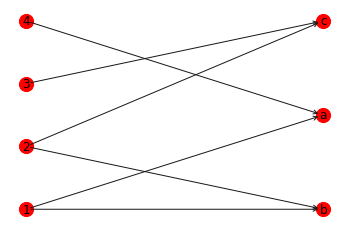

In [25]:
plot_graph(B,bipartite=True,bipartite_nodes=[1,2,3,4])

### 参考资料

1. https://networkx.org/documentation/stable/
